# Exercise 21: Preparing data for a linear regression model

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('weather.csv')

In [14]:
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [16]:
levels = len(df['Description'].value_counts())
print('There are {} labels in description column'.format(levels))

There are 3 labels in description column


In [17]:
'''Multi class variable must be converted into dummy variable via a process termed "dummy coding"
Dummy coding a multiclass categorical variable created n-1 new binary features, which corresponds to the levels within 
the categorical variable. For example, a multi-class categorical variable with three levels will create 2 binary 
features. After the multi-class, categorical feature has been dummy coded, the original feature must be dropped.'''

df_dummies = pd.get_dummies(df, drop_first= True)

'''We have transformed this feature into n-1 (that is 2), separated dummy variables and dropped the original feature,
Description'''

print('There are {} columns in df_dummies'.format(df_dummies.shape[1]))

There are 9 columns in df_dummies


In [19]:
df_dummies.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0


In [20]:
'''to remove any possible order effects in the data shuffle the data'''

from sklearn.utils import shuffle
df_shuffled = shuffle(df_dummies, random_state= 42)

In [21]:
'''Splitting the data into dependent and independent feature'''

x = df_shuffled.drop('Temperature_c', axis = 1)
y = df_shuffled['Temperature_c']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=100)

In [23]:
X_train.head()

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
3041,0.65,35.4200,310,11.270,1006.90,1,1,0
8566,0.65,1.6261,53,9.982,1036.08,1,0,0
737,0.90,4.8622,333,7.245,1026.51,1,0,0
8082,0.26,11.0607,198,9.982,1010.01,1,0,1
5712,0.89,5.4418,196,9.982,1013.52,1,1,0


# Exercise 22 : Fitting a simple linear regression model and determining the Intercept and coefficient

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(X_train[['Humidity']],y_train)

LinearRegression()

In [32]:
intercept = model.intercept_

In [33]:
intercept

34.64041982293602

In [34]:
coefficient = model.coef_

In [35]:
coefficient

array([-30.98213258])

In [39]:
print("Temperature = {0:0.2f} + ({1:0.2f} X humidity)".format(intercept,coefficient[0]))

Temperature = 34.64 + (-30.98 X humidity)


# Exercise 23: Generating predictions and Evaluating the performance of a simple Linear regression

In [41]:
predictions = model.predict(X_test[['Humidity']])

In [42]:
predictions

array([ 5.82703653,  5.82703653, 21.62792414, ...,  3.65828725,
       12.02346304, 12.33328437])

A common way to evaluate the performance is to examine the correlation between he predicted and actual values using a scatterplot. The scatterplot displays the relationship between the actual and predicted values. A perfect regression model will display a straight, diagonal line between the predicted and actual values. The relationship between the predicted and actual values can be quantifies using the pearsonr correlation coefficient. 

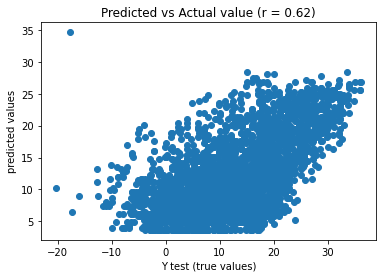

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(y_test, predictions)
plt.xlabel('Y test (true values)')
plt.ylabel('predicted values')
plt.title('Predicted vs Actual value (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

The model that fits the data very well will have **normally distributed residuals**. To create a density plot refer below


C:\Users\tkhan050\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


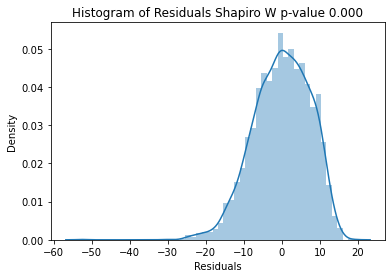

In [50]:

import seaborn as sns
from scipy.stats import shapiro
sns.distplot((y_test - predictions), bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals Shapiro W p-value {0:0.3f}'.format(shapiro(y_test-predictions)[1]))
plt.show()

The histogram shows that the residuals are negatively skewed and the value of the Sgapiro W p-value in the title tells 
us that the distribution is normal. This gives us further evidence that our model has room for improvement

In [53]:
'''Lastly we compute metrics for mean absolute error, mean squared error, root mean squared error, R-squared
and put them together into a DataFrame'''

from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame({'Metrics':['MAE','MSE','RMSE','R-Squared'], 
                           'value':[metrics.mean_absolute_error(y_test,predictions),
                                   metrics.mean_squared_error(y_test,predictions),
                                   np.sqrt(metrics.mean_squared_error(y_test,predictions)),
                                   metrics.explained_variance_score(y_test,predictions)]})
print(metrics_df)

     Metrics      value
0        MAE   5.994687
1        MSE  54.814496
2       RMSE   7.403681
3  R-Squared   0.381236
